# **Project Name**    - Integrated Retail Analytics for store optimization and demand forecasting.



##### **Project Type**    - Regression & Collaborative Filtering
##### **Contribution**    - Individual
##### **By -** Aayush Kaul


# **Project Summary -**

Objective

The project aims to optimize retail store performance by leveraging machine learning and data analysis to:

Forecast sales at store–department level,

Understand customer purchasing patterns,

Recommend products/departments for promotions,

Support data-driven decisions in inventory, staffing, and marketing.

🔹 Data Used

Stores dataset → store type, size, identifiers.

Features dataset → economic indicators (CPI, Unemployment), holidays, markdowns (promotions).

Sales dataset → weekly sales by store and department.

Key preprocessing steps:

Handling missing values (markdowns → imputed with 0, flags created).

Feature engineering: lag features, rolling averages, temporal variables (year, month, week).

Encoding store types and creating dummy variables.

🔹 Machine Learning Models
1. Sales Forecasting Model (Regression)

Goal: Predict weekly sales for each store–department.

Approach: Supervised regression (Random Forest / LightGBM / XGBoost).

Features: Store attributes, markdowns, economic indicators, lag/rolling sales.

Outcome:

RMSE used for evaluation.

Identified seasonal trends, impact of promotions, and holiday spikes.

2. Recommendation System (Collaborative Filtering – SVD)

Goal: Recommend top-selling departments for each store.

Approach: Surprise SVD collaborative filtering on Store–Dept sales matrix.

Outcome: Generated Top-5 recommended departments per store to guide promotions and cross-selling.

Lastly, we came with personalized marketing strategies to overcome this situation and improve the sales.

# **GitHub Link -**

## https://github.com/AayushKaul-ai

# **Problem Statement**


**To enhance customer experience by optimizing store performance by forecasting the demand,customer segmentation and personalized marketing strategies.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [44]:
# Import Libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score
import joblib

### Dataset Loading

In [45]:
# Load Dataset
Features =pd.read_csv('Features data set.csv')
Sales =pd.read_csv('sales data-set.csv')
Stores =pd.read_csv('stores data-set.csv')

### Dataset First View

In [46]:
# Dataset First Look
Features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [47]:
Sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05-02-2010,24924.50,False
1,1,1,12-02-2010,46039.49,True
2,1,1,19-02-2010,41595.55,False
3,1,1,26-02-2010,19403.54,False
4,1,1,05-03-2010,21827.90,False


In [48]:
Stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


Merging Dataset

In [49]:
# Convert Date column to datetime
Sales['Date'] = pd.to_datetime(Sales['Date'], format='%d-%m-%Y')
Features['Date'] = pd.to_datetime(Features['Date'], format='%d/%m/%Y')

In [50]:
# Join Dataset
df = pd.merge(Sales, Features, on=['Store', 'Date', 'IsHoliday'], how='left')
df = pd.merge(df, Stores, on='Store', how='left')

In [51]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


### Dataset Rows & Columns count

In [52]:
# Dataset Rows & Columns count
df.shape

(421570, 16)

### Dataset Information

In [53]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

#### Duplicate Values

In [54]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [55]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,270889
MarkDown2,310322
MarkDown3,284479


<Axes: >

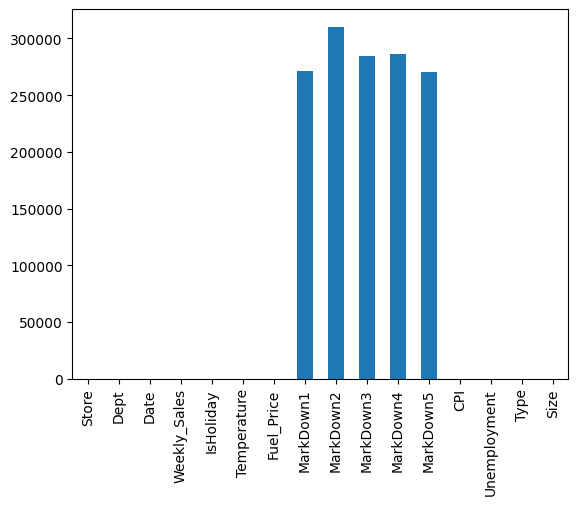

In [56]:
# Visualizing the missing values
df.isnull().sum().plot(kind='bar')

### What did you know about your dataset?

We came to know that there are multiple markdown columns that have many null values to be treated.

## ***2. Understanding Your Variables***

In [57]:
# Dataset Columns
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [58]:
# Dataset Describe
df.describe

<bound method NDFrame.describe of         Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
0           1     1 2010-02-05      24924.50      False        42.31   
1           1     1 2010-02-12      46039.49       True        38.51   
2           1     1 2010-02-19      41595.55      False        39.93   
3           1     1 2010-02-26      19403.54      False        46.63   
4           1     1 2010-03-05      21827.90      False        46.50   
...       ...   ...        ...           ...        ...          ...   
421565     45    98 2012-09-28        508.37      False        64.88   
421566     45    98 2012-10-05        628.10      False        64.89   
421567     45    98 2012-10-12       1061.02      False        54.47   
421568     45    98 2012-10-19        760.01      False        56.47   
421569     45    98 2012-10-26       1076.80      False        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.572        NaN        NaN        NaN        NaN        NaN   
1            2.548        NaN        NaN        NaN        NaN        NaN   
2            2.514        NaN        NaN        NaN        NaN        NaN   
3            2.561        NaN        NaN        NaN        NaN        NaN   
4            2.625        NaN        NaN        NaN        NaN        NaN   
...            ...        ...        ...        ...        ...        ...   
421565       3.997    4556.61      20.64       1.50    1601.01    3288.25   
421566       3.985    5046.74        NaN      18.82    2253.43    2340.01   
421567       4.000    1956.28        NaN       7.89     599.32    3990.54   
421568       3.969    2004.02        NaN       3.18     437.73    1537.49   
421569       3.882    4018.91      58.08     100.00     211.94     858.33   

               CPI  Unemployment Type    Size  
0       211.096358         8.106    A  151315  
1       211.242170         8.106    A  151315  
2       211.289143         8.106    A  151315  
3       211.319643         8.106    A  151315  
4       211.350143         8.106    A  151315  
...            ...           ...  ...     ...  
421565  192.013558         8.684    B  118221  
421566  192.170412         8.667    B  118221  
421567  192.327265         8.667    B  118221  
421568  192.330854         8.667    B  118221  
421569  192.308899         8.667    B  118221  

[421570 rows x 16 columns]>

### Variables Description

There are variables like Date which gives the date of sales, Weekly Sales, Markdown to say whether any offer was given that time or not etc.

### Check Unique Values for each variable.

In [59]:
# Check Unique Values for each variable.
df.nunique()

,0
Store,45
Dept,81
Date,143
Weekly_Sales,359464
IsHoliday,2
Temperature,3528
Fuel_Price,892
MarkDown1,2277
MarkDown2,1499
MarkDown3,1662


### Feature Engineering and Data Preprocessing

In [60]:
# Write your code to make your dataset analysis ready.
#Date Features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Lag feature (previous week's sales per store-department)
df['Lag_1'] = df.groupby(['Store','Dept'])['Weekly_Sales'].shift(1)
df['Rolling_Mean_4'] = df.groupby(['Store','Dept'])['Weekly_Sales'].shift(1).rolling(4).mean()

In [61]:
# Prepare data for modeling
Features[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']] = (Features[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0))

# Apply one-hot encoding to the 'Type' column
df = pd.get_dummies(df, columns=['Type'], drop_first=True)

# Define features and target
X = df.drop(columns=["Weekly_Sales", "Date"])
y = df["Weekly_Sales"]

# Train-test split (time-based, last 3 months as validation)
train = df[df['Year'] < 2012]
test = df[df['Year'] == 2012]

X_train, y_train = train.drop(columns=["Weekly_Sales", "Date"]), train["Weekly_Sales"]
X_test, y_test = test.drop(columns=["Weekly_Sales", "Date"]), test["Weekly_Sales"]

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Total Sales Over Time

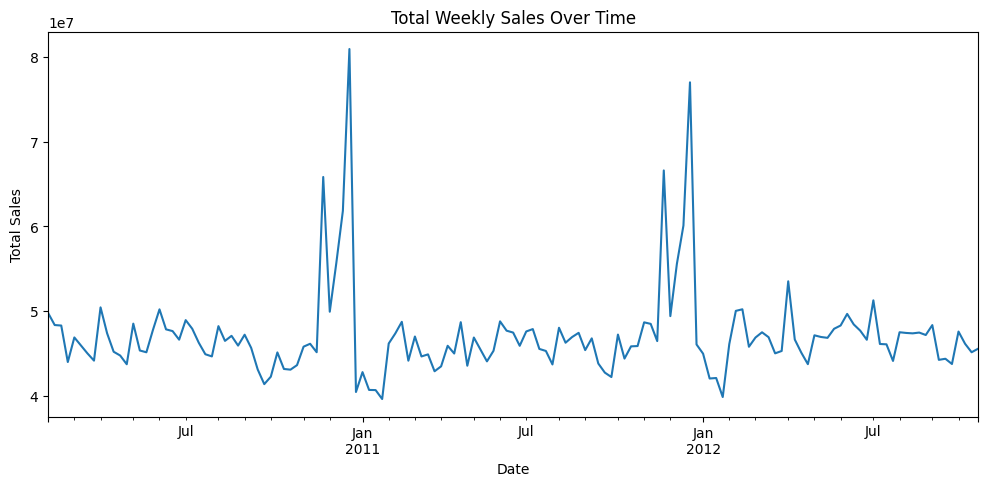

In [62]:
# Chart - 1 visualization code
plt.figure(figsize=(12,5))
Sales.groupby('Date')['Weekly_Sales'].sum().plot()
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

I picked the specific chart to find the seasonality of sales if it exists.

The insight I found is that the sales spike around new year time thus showing a clear seasonality.

This insight indicates a negative growth that the sales remain fairly stagnant year round at a level much lower than the peak sales happening at new year which is not good.


#### Chart - 2 Sales Distribution By Store

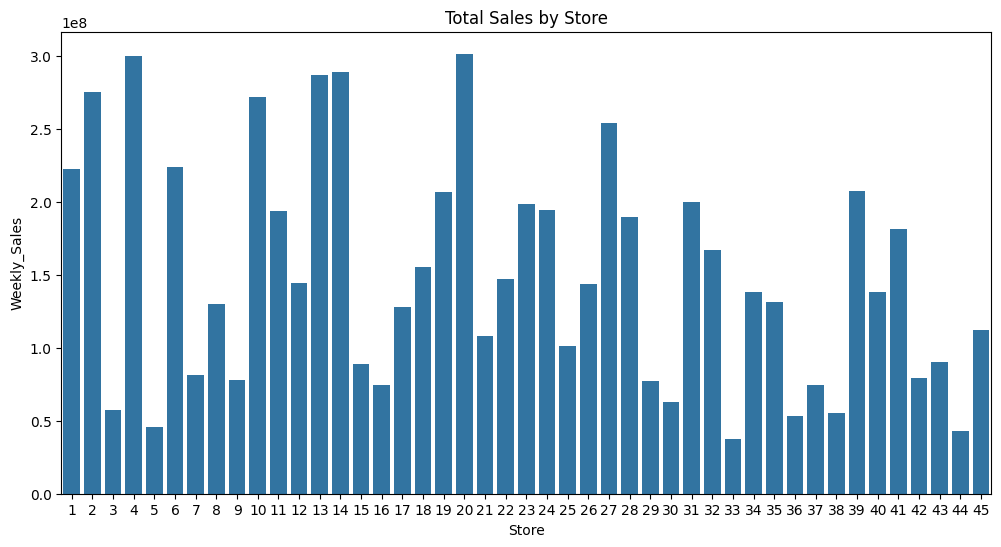

In [63]:
# Chart - 2 visualization code
plt.figure(figsize=(12,6))
store_sales = Sales.groupby('Store')['Weekly_Sales'].sum().reset_index()
sns.barplot(x='Store', y='Weekly_Sales', data=store_sales)
plt.title("Total Sales by Store")
plt.show()

I picked this chart because I wanted to know which stores are performing better than the others.

The insight I found is that stores 3, 13, 20 showed the highest sales. While stores like 5, 7, 9, 15, 32, 37, 43, 45 showed relatively low weekly sales which showed non - uniformity in the sales.

Yes, the gained insights would help in creating a positive business impact because it would help us benchmark the high performing stores which would in turn help us replicating their strategies on other under performing stores.

Yes, there is a negative insight that very few stores are performing well which means if god forbid something happens to those stores and those stores shut down then the sales would drop down drastically.

#### Chart - 3 Sales Distribution By Department

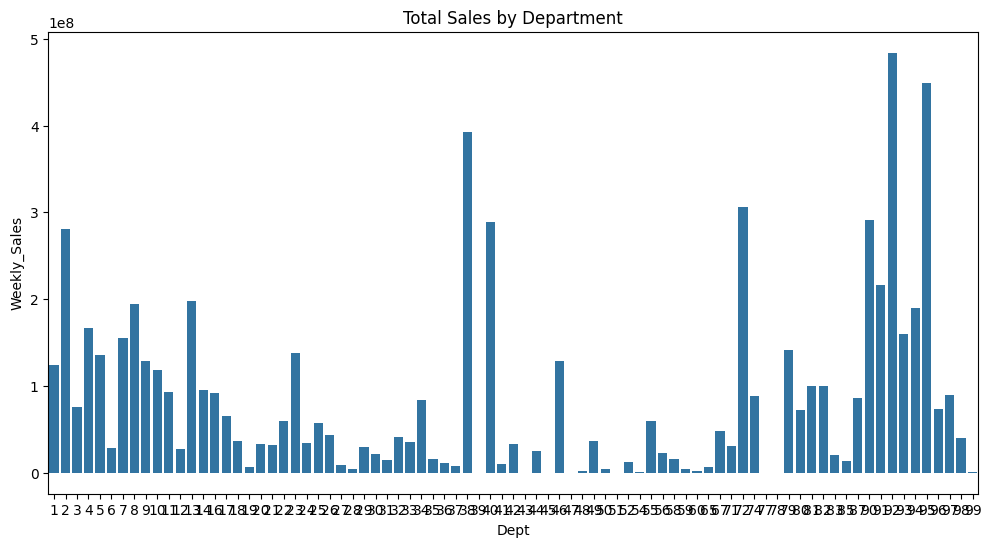

In [64]:
# Chart - 3 visualization code
dept_sales = Sales.groupby('Dept')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='Dept', y='Weekly_Sales', data=dept_sales)
plt.title("Total Sales by Department")
plt.show()

I picked this specific chart because I wanted to know which departemnts contribute to the most sales.

I infered that departments 92,95,38, 72, and 3 show the highest sales, with 92 leading (close to 500M).These likely represent core categories
e.g., groceries, electronics, seasonal items that drive the bulk of revenue.

Departments like 5 - 12, 18, 20, 39, 41, 72, 90 maintain steady mid-level sales, contributing consistently but not dominating.
These may be essential support categories with steady demand (e.g., apparel, household items).

Many departments especially 40 – 70 range, except a few spikes have very low sales (below 50M).
These could be niche categories or under-optimized product lines.


Yes, the given insights would help in positive business growth because they could help us make strategies regarding how to increase sales like they can help us decide wheteher we should expand and promote the departments already perform,ing well or we should focus on solving the underlying issues in the underperforming departments.

Yes, there is an insight that shows negative growth and that is the excellent performance of only a few departments while poor performance of most of them.

#### Chart - 4 Holiday vs Non Holiday Sales

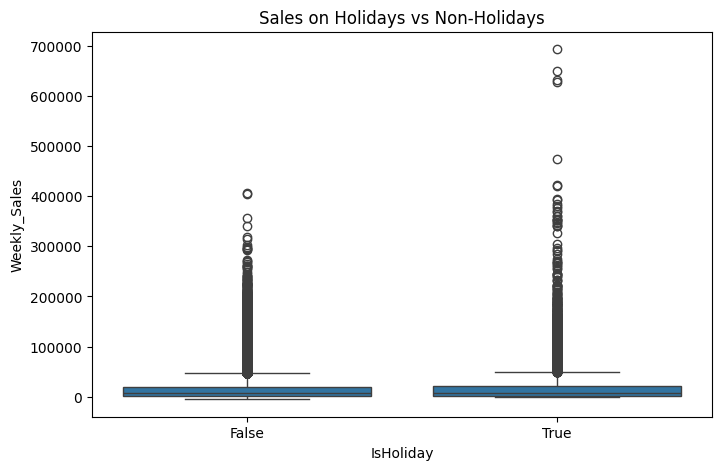

In [65]:
# Chart - 4 visualization code
plt.figure(figsize=(8,5))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=Sales)
plt.title("Sales on Holidays vs Non-Holidays")
plt.show()

To check whether the sales vary signifcantly on holidays.

The insight I found out is that during holidays, the weekly sales rise sharply indicating that people buy more during holidays like Christmas, Diwali unlike on non - holidays where weekly sales don't change much.

Yes, the gained insight would be helpful in creating a positive business impact because it indicates that we should do more targeted promotions during holidays to get more sales.

#### Chart - 5 Seasonality: Average Sales By Month

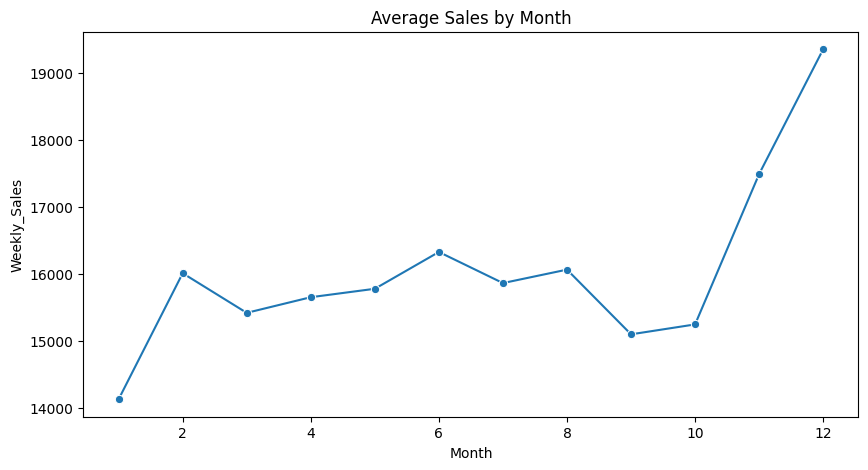

In [66]:
# Chart - 5 visualization code
Sales['Month'] = Sales['Date'].dt.month
monthly_sales = Sales.groupby('Month')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x='Month', y='Weekly_Sales', data=monthly_sales, marker='o')
plt.title("Average Sales by Month")
plt.show()

I picked the specific chart to check whether there is any seasonality in the sales or not.

I found that the sales peak after the 10th month in 11th and 12th month because of holidays coming at that time.

Yes, the gained insight would help us in positive business impact because it would encourage us to increase the stock and allocate more resources in Q4 as the demand surges at that time.

#### Chart - 6 Heatmap: Store vs  Month Sales

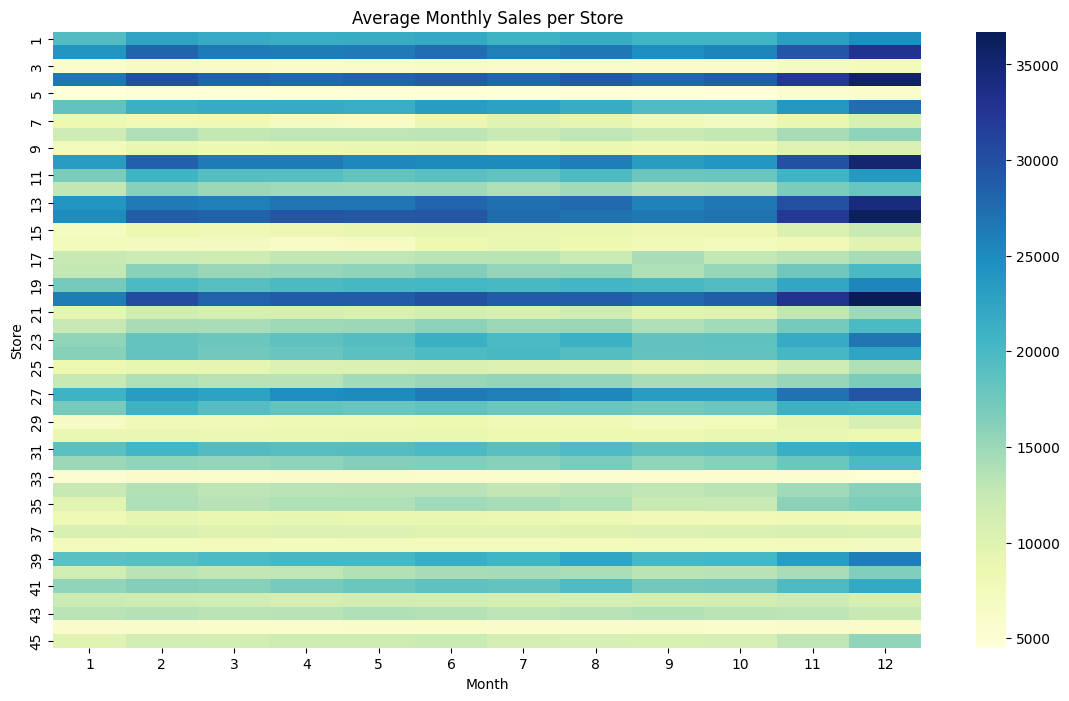

In [67]:
# Chart - 6 visualization code
heatmap_data = Sales.groupby([Sales['Store'], Sales['Date'].dt.month])['Weekly_Sales'].mean().unstack()

plt.figure(figsize=(14,8))
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title("Average Monthly Sales per Store")
plt.xlabel("Month")
plt.ylabel("Store")
plt.show()

To compare the performance of each store across months.

The insightn I found is that Stores 3, 13, 20, 36 consistently appear darker (higher sales) across months.
These are the anchor stores driving a large share of total revenue.

Stores like 5, 9, 15, 33, 35, 37, 43, 45 remain lighter across all months, indicating consistently low sales performance.They likely suffer from weaker demand, location disadvantages, or limited assortment.

Some stores (e.g., 11, 21, 29, 39) show relatively stable sales throughout the year (medium shades), suggesting steady performers with less seasonal fluctuation.

Yes, these insights would help in positive business impact
because it would help us cluster the stores on the basis of their performances which would help us make targeted marketing strategies.

#### Chart - 7 Correlation with features dataset

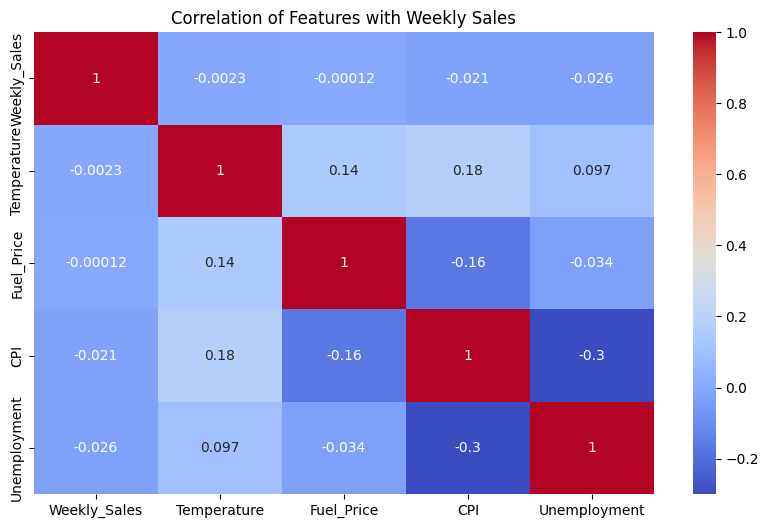

In [68]:
# Chart - 7 visualization code
Features = pd.read_csv("Features data set.csv")
Features['Date'] = pd.to_datetime(Features['Date'], format='%d/%m/%Y')

plt.figure(figsize=(10,6))
sns.heatmap(df[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation of Features with Weekly Sales")
plt.show()

To check whether the weekly sales depend on such external factors.

The insight I found is that weekly sales only depends on the unemployment which is understandable as more unemploymennt wwould mean more people would be unwilling to buy stuffs.

Yes, the gained insight is helpful because it tells us that we don't need to focus much on external factors and just need to focus on other factors like seasonality etc.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

Null Hypothesis: There is no difference in average weekly sales between holiday weeks and non - holiday weeks.
Alternate Hypothesis: Holiday weeks have different average weekly sales compared to non holiday weeks.

In [69]:
# Perform Statistical Test to obtain P-Value
# t test
from scipy import stats
Sales['Date'] = Sales['Date'].dt.strftime('%Y-%m-%d')
Sales['Date'] = pd.to_datetime(Sales['Date'])

In [70]:
# Split Data
holiday_sales = Sales[Sales['IsHoliday'] == True]['Weekly_Sales']
non_holiday_sales = Sales[Sales['IsHoliday'] == False]['Weekly_Sales']

In [71]:
# Perform independent t-test
t_stat, p_val = stats.ttest_ind(holiday_sales, non_holiday_sales, equal_var=False)

In [72]:
print("T-statistic:", t_stat)
print("P-value:", p_val)

T-statistic: 7.000740275222607
P-value: 2.5951250265739975e-12


In [73]:
if p_val < 0.05:
    print("Reject Null Hypothesis: Holiday weeks significantly affect sales")
else:
    print("Fail to Reject Null Hypothesis: No significant holiday effect")

Reject Null Hypothesis: Holiday weeks significantly affect sales


I did t-test.

I did this test because here I had to check the difference between the means of 2 different groups.

### Hypothetical Statement - 2

Null Hypothesis: Store type does not affect weekly sales.

Alternate Hypothesis: Store type saignificantly affects weekly sales.

In [74]:
# Perform Statistical Test to obtain P-Value
# ANOVA
from scipy.stats import f_oneway
df =Sales.merge(Stores, on ='Store')
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df = pd.get_dummies(df, columns=['Type'], drop_first=True)

#Date Features
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Lag feature (previous week's sales per store-department)
df['Lag_1'] = df.groupby(['Store','Dept'])['Weekly_Sales'].shift(1)
df['Rolling_Mean_4'] = df.groupby(['Store','Dept'])['Weekly_Sales'].shift(1).rolling(4).mean()

In [75]:
# Group sales by store type
groups = [group["Weekly_Sales"].values for name, group in df.groupby(["Type_B", "Type_C"])]

# One-way ANOVA
f_stat, p_val = f_oneway(*groups)

print("F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject Null Hypothesis: Store type significantly affects sales")
else:
    print("Fail to Null Hypothesis: Store type does not significantly affect sales")

F-statistic: 7764.426217449252
P-value: 0.0
Reject Null Hypothesis: Store type significantly affects sales


I did ANOVA test.

I did ANOVA test because here I had to compare the means among more than 2 different groups.

### Hypothetical Statement - 3

Null Hypothesis: External factors like CPI, Unemployment have no effect on weekly sales.

Alternate Hypothesis: External factors do have an effect on weekly sales.

In [76]:
# Perform Statistical Test to obtain P-Value
Features['Date'] = pd.to_datetime(Features['Date'])
df = Sales.merge(Features, on=['Store','Date'])
corr = df[['Weekly_Sales','CPI','Fuel_Price','Unemployment']].corr()
print(corr['Weekly_Sales'])

Weekly_Sales    1.000000
CPI            -0.020921
Fuel_Price     -0.000120
Unemployment   -0.025864
Name: Weekly_Sales, dtype: float64


Hence, we can infer that these factors do not afffect the weekly sales because they have a correlation <-3|.

Correlation test.

I chose this test because I had to find the correlation between the weekly sales and continuous variables.

## ***7. ML Model Implementation***

### ML Model - 1 Sales Forecasting

In [77]:
# ML Model - 1 Implementation
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Train model
model = XGBRegressor(n_estimators=500, learning_rate=0.1, max_depth=8, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 3919.3097121243923
MAE: 1701.9437672112626


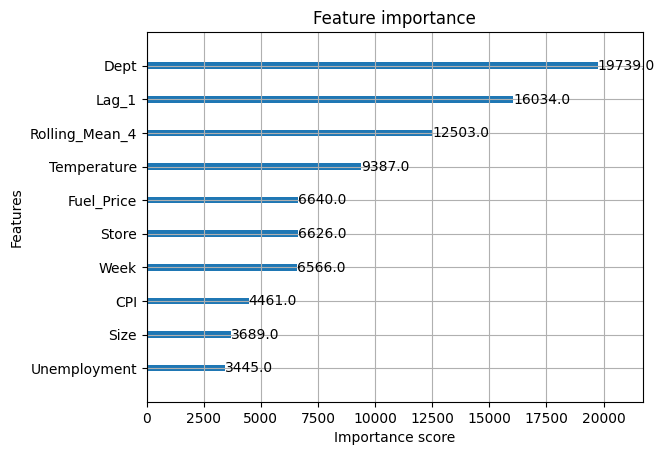

In [78]:
#  Selecting  relevant features
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(model, max_num_features=10)
plt.show()

In [79]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
import numpy as np
import xgboost as xgb

X = df.drop(columns=['Weekly_Sales','Date','Unemployment'])
y = df['Weekly_Sales']

tscv = TimeSeriesSplit(n_splits=5)

model = xgb.XGBRegressor(objective='reg:squarederror')

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)


RMSE: 3919.3097121243923
MAE: 1701.9437672112626


In [80]:
# Predict on the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Predictions:",y_pred)
print("RMSE:", rmse)
print("MAE:", mae)

Predictions: [16781.582    12888.779    13298.021    ...   -34.973648   258.6075
   563.70624 ]
RMSE: 3919.3097121243923
MAE: 1701.9437672112626


### ML Model - 2 Recommendation Model

In [81]:
if 'Sales' not in globals():
    possible = ['sales data-set.csv', 'sales_data.csv', 'sales.csv', 'Sales.csv']
    found = None
    for p in possible:
        fp = os.path.join('/mnt/data', p)
        if os.path.exists(fp):
            found = fp
            break
    if found:
        Sales = pd.read_csv(found)
        # Try to parse a date column if present
        for c in Sales.columns:
            if 'date' in c.lower():
                Sales['Date'] = pd.to_datetime(Sales[c])
                break
    else:
        raise RuntimeError("No Sales DataFrame found and no common CSV in /mnt/data. "
                           "Load your sales dataframe into `Sales` before running this cell.")

if 'Store' not in Sales.columns:
    for c in Sales.columns:
        if 'store' in c.lower():
            Sales = Sales.rename(columns={c:'Store'})
            break
if 'Dept' not in Sales.columns:
    for c in Sales.columns:
        if 'dept' in c.lower() or 'department' in c.lower():
            Sales = Sales.rename(columns={c:'Dept'})
            break
if 'Weekly_Sales' not in Sales.columns:
    for c in Sales.columns:
        if c.lower() in ('weekly_sales','sales','weekly sales','weeklysales'):
            Sales = Sales.rename(columns={c:'Weekly_Sales'})
            break

In [82]:
ratings = Sales.groupby(['Store','Dept'])['Weekly_Sales'].mean().reset_index()

ratings['Store'] = ratings['Store'].astype(str)
ratings['Dept'] = ratings['Dept'].astype(str)

# ---------- Prepare Reader with safe rating_scale ----------
min_rating = float(ratings['Weekly_Sales'].min())
max_rating = float(ratings['Weekly_Sales'].max())
# If all ratings are the same, set a safe lower bound 0 (Surprise rejects equal min==max)
if min_rating == max_rating:
    min_rating = 0.0

In [83]:
!pip install surprise

In [84]:
!pip install numpy==1.26.4

In [85]:
# ML Model - 2 Implementation
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Prepare data (aggregate by Store & Dept)
ratings = Sales.groupby(['Store','Dept'])['Weekly_Sales'].mean().reset_index()

# Surprise requires rating-like format
reader = Reader(rating_scale=(ratings['Weekly_Sales'].min(), ratings['Weekly_Sales'].max()))
data = Dataset.load_from_df(ratings[['Store','Dept','Weekly_Sales']], reader)

trainset, testset = train_test_split(data, test_size=0.2)
# Fit the Algorithm
model = SVD()
model.fit(trainset)

# Predict on the model
predictions = model.test(testset)

print("RMSE:", accuracy.rmse(predictions))
print("MAE:", accuracy.mae(predictions))
print(predictions)

RMSE: 169816.6955
RMSE: 169816.69548619786
MAE:  168559.3295
MAE: 168559.32954329567
[Prediction(uid=6, iid=78, r_ui=7.555555555555555, est=182527.95601398603, details={'was_impossible': False}), Prediction(uid=44, iid=71, r_ui=-41.28333333333333, est=182527.95601398603, details={'was_impossible': False}), Prediction(uid=32, iid=20, r_ui=5057.866713286713, est=182527.95601398603, details={'was_impossible': False}), Prediction(uid=7, iid=51, r_ui=35.368205128205126, est=182527.95601398603, details={'was_impossible': False}), Prediction(uid=22, iid=19, r_ui=939.8711904761903, est=182527.95601398603, details={'was_impossible': False}), Prediction(uid=18, iid=58, r_ui=3844.2268531468526, est=182527.95601398603, details={'was_impossible': False}), Prediction(uid=34, iid=72, r_ui=36636.553076923075, est=182527.95601398603, details={'was_impossible': False}), Prediction(uid=40, iid=49, r_ui=43.962112676056336, est=182527.95601398603, details={'was_impossible': False}), Prediction(uid=29, iid=

## ***8.***  Personalized Marketing Strategies

Segment Stores by Performance & Demographics

High-performing stores: Already strong demand; customers may be less price-sensitive.

Strategy → Fewer markdowns, focus on premium bundles, exclusive launches and loyalty rewards.

Medium-performing stores: Moderate demand, room for growth.

Strategy → Targeted markdown campaigns on popular categories, cross-sell with personalized coupons.

Low-performing stores: Struggle with sales volume, higher price sensitivity.

Strategy → Aggressive markdowns, Buy One Get One offers, and festive promotions to boost footfall and reduce inventory.

2. Markdown-Based Personalization

Holiday Seasons (high sales weeks):

Offer category-specific markdowns (e.g., toys, apparel, electronics) aligned with seasonal demand.

Personalized digital flyers via SMS/email highlighting relevant discounts for each customer segment.

Off-Peak Weeks:

Run “surprise markdown” campaigns to stimulate demand.

Leverage customer history → If a shopper buys groceries often, push discounts on complementary items (e.g., 10% off cleaning products with food purchases).

3. Customer Targeting Strategies

Price-Sensitive Customers (frequent markdown buyers):

Send early-access discount alerts and bundle deals.

High-Spend Loyal Customers:

Focus less on markdowns; provide exclusive previews, cashback rewards, or premium loyalty perks.

Occasional Shoppers:

Offer time-limited markdowns to trigger urgency.

4. Omnichannel Execution

In-store: Digital kiosks displaying personalized promotions by scanning loyalty cards.

Online: Tailored recommendation engines → “You might like these discounted products based on your past purchases.”

Push Notifications/Email: Dynamic markdown-based campaigns triggered by customer behavior (e.g., cart abandonment → send discount on those items).

5. Data-Driven Optimization

Use historical sales + markdown response data to:

Identify optimal discount depth (e.g., 20% vs 40%).

Forecast sales uplift vs margin erosion.

Run A/B tests across store segments to refine personalization.

#9. Comprehensive Retail Strategy and its Challenges:


1. Inventory Management Strategy

Insights leveraged:

Seasonality in sales (some months consistently higher).

Store-level demand differences.

External factors (fuel price, unemployment, CPI show moderate relationships).

Actions:

Demand Forecasting: Use ML models (time series + external regressors like CPI, unemployment, fuel price) for store-level demand prediction.

Dynamic Replenishment: Automate stock replenishment based on real-time sales velocity and predicted demand.

Markdown-linked Inventory Control: Apply markdowns strategically on overstocked items or slow movers (instead of blanket discounting).

Safety Stock Adjustments: Adjust buffer stock based on store performance — high-volume stores keep higher safety stock.

Challenges:

Forecasting errors due to economic volatility (fuel price, inflation).

Logistics constraints in timely delivery.

Overdependence on markdowns may distort inventory cycles.

2. Marketing & Personalization Strategy

Insights leveraged:

Store sales heatmap shows high-performing vs low-performing outlets.

Weak correlation between weekly sales and external factors → promotions should rely more on behavioral/customer data.

Actions:

Segmented Markdown Promotions:

High-performing stores → targeted markdowns only during low-demand months.

Low-performing stores → continuous micro-promotions (bundle deals, loyalty points).

Customer Personalization: Use purchase history & loyalty program data for tailored promotions (e.g., personalized coupons on items frequently bought).

Cross-Selling & Bundling: Bundle high-demand and slow-moving products to reduce dead stock.

Event-Based Marketing: Push markdowns during holidays/festivals when price sensitivity is higher.

Challenges:

Customers may get habituated to discounts.

Difficulty in syncing promotions across offline and online channels.

Privacy issues if personalization feels too intrusive.

3. Store Optimization Strategy

Insights leveraged:

Significant variation in store performance (some consistently outperform).

Monthly trend → seasonality + regional demand differences.

Actions:

Store Segmentation:

Tier 1 stores (high sales, high traffic) → focus on premium SKUs, brand visibility, and limited markdowns.

Tier 2 stores (moderate performance) → mix of markdowns, bundling, and local marketing.

Tier 3 stores (low-performing) → aggressive local promotions, staff training, and operational efficiency.

Staff Training & Incentives: Train store managers in data-driven decision-making; link incentives to markdown efficiency, not just sales volume.

Layout & Category Optimization: Place high-margin products in prominent zones; align in-store displays with demand cycles.

Digital Integration: Enable mobile-based loyalty apps, QR discounts, and in-store digital kiosks for promotions.

Challenges:

Operational inconsistency across stores.

Resistance from staff to adopt new tech-driven processes.

High-performing stores may resist markdown strategies that could dilute brand perception.

# **Conclusion**

Thus, we were able to analyze this situation and find solutions to improve the sales across departments.